# IPL Matches From 2008-2019 Data Analysis

Today We are going to analyse the data of IPL matches from 2008-2019 Using Python.We are going to use Pandas, Numpy, Matplotlib and Seaborn to analyse and visulaize this large data.I have learnt all this from  [Jovian.ml](http://zerotopandas.com). From basic python to data analysis.

In [1]:
project_name = "ipl-matches-data-analysis" # change this

In [2]:
!pip install jovian --upgrade -q
!pip install pandas --upgrade -q

In [3]:
import jovian

In [4]:
jovian.commit(project=project_name, files=['ipl.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "varungupta-cse19/ipl-matches-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/varungupta-cse19/ipl-matches-data-analysis


'https://jovian.ml/varungupta-cse19/ipl-matches-data-analysis'

## Data Preparation and Cleaning

Here we import some libraries and read our data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [6]:
matches_df = pd.read_csv('ipl.csv')

In [7]:
matches_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium


This is the data on which we are working and see some interesting work

In [8]:
matches_df.shape

(756, 15)

In [9]:
matches_df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [10]:
matches_df.head(10)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal"
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium
8,9,IPL-2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium


In [11]:
import matplotlib

In [12]:
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [13]:
import jovian

In [14]:
jovian.commit(file=['ipl.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "varungupta-cse19/ipl-matches-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/varungupta-cse19/ipl-matches-data-analysis


'https://jovian.ml/varungupta-cse19/ipl-matches-data-analysis'

## Exploratory Analysis and Visualization

Here we see some graphical representation of the data 

In [15]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
dtypes: int64(4), object(11)
memory usage: 88.7+ KB


In [16]:
#total matches we've got in the data set
matches_df['id'].max()

11415

In [17]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]

id                               44
Season                     IPL-2017
city                          Delhi
date                     06-05-2017
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
Name: 43, dtype: object

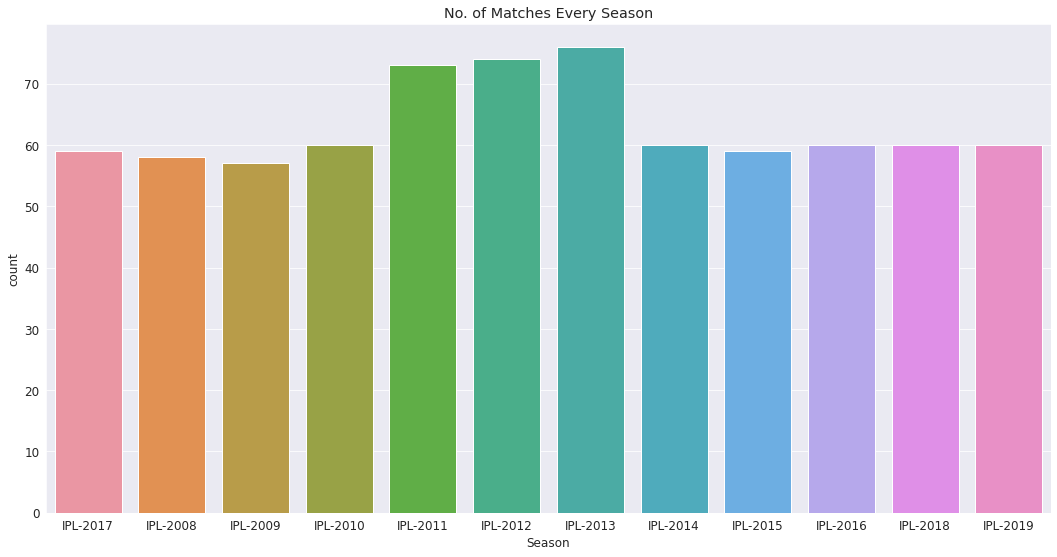

In [18]:
# Number of matches Every Season
plt.figure(figsize=(18, 9))
sns.countplot(x='Season', data=matches_df)
plt.title("No. of Matches Every Season")
plt.show()

This show that most number of matches was held in 2013 followed by 2012 and so on.

<Figure size 1296x648 with 0 Axes>

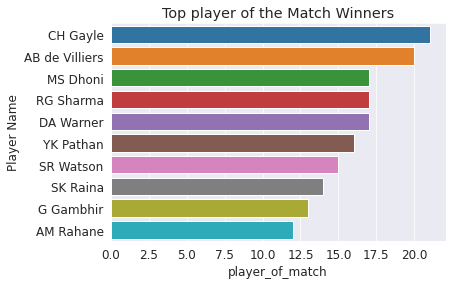

In [19]:
#Top 10 Player of the Match Winners
plt.figure(figsize=(18, 9))
top_players = matches_df.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Player Name")
ax.set_xlabel("No. of Times")
ax.set_title("Top player of the Match Winners")
sns.barplot(x = top_players, y = top_players.index, orient='h'); 
plt.show()

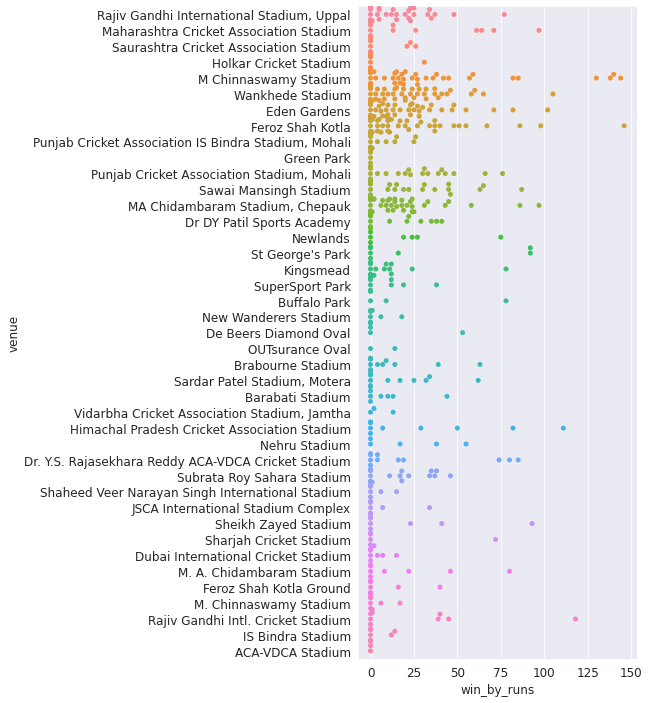

In [20]:
# best defending venue
plt.figure(figsize=(5, 12))
sns.swarmplot(x='win_by_runs', y='venue', data=matches_df)
plt.show()

From the above figure we conclude that the best venue for defending is MA Chidambaram Stadium


In [21]:
#Extracting The records where a team won batting first
bat_first = matches_df[matches_df['win_by_runs']!=0]
bat_first.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
8,9,IPL-2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium
13,14,IPL-2017,Kolkata,15-04-2017,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens
14,15,IPL-2017,Delhi,15-04-2017,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla


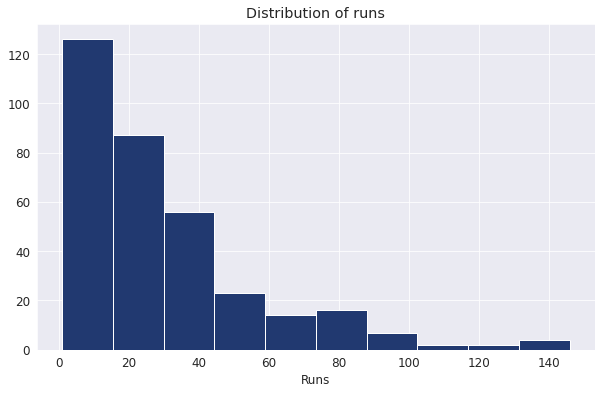

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(bat_first['win_by_runs'], color='#213970')
plt.title("Distribution of runs")
plt.xlabel("Runs")
plt.show()

In [23]:
#finding out the number of wins w.r.t each team after batting first
bat_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

In [24]:
# Getting the Frequency of the result column
matches_df['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [30]:
import jovian

In [25]:
jovian.commit(files=['ipl.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "varungupta-cse19/ipl-matches-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/varungupta-cse19/ipl-matches-data-analysis


'https://jovian.ml/varungupta-cse19/ipl-matches-data-analysis'

## Asking and Answering Questions


#### Q1. Does Chossing batting or bowling first helped in match winning?


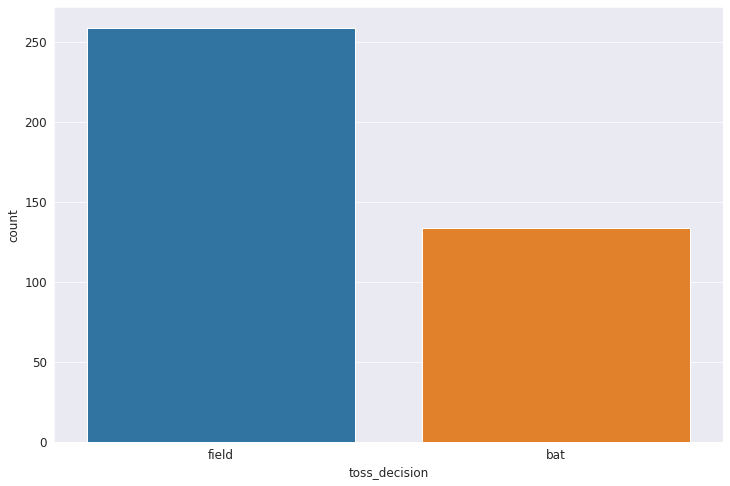

In [26]:
plt.figure(figsize=(12, 8))
sns.countplot(matches_df.toss_decision[matches_df.toss_winner==matches_df.winner]);

So according to above plot the team who is chasing that means who chose to fiels first wins the match most of the time

####  Q2. In which city does weather affected matches?

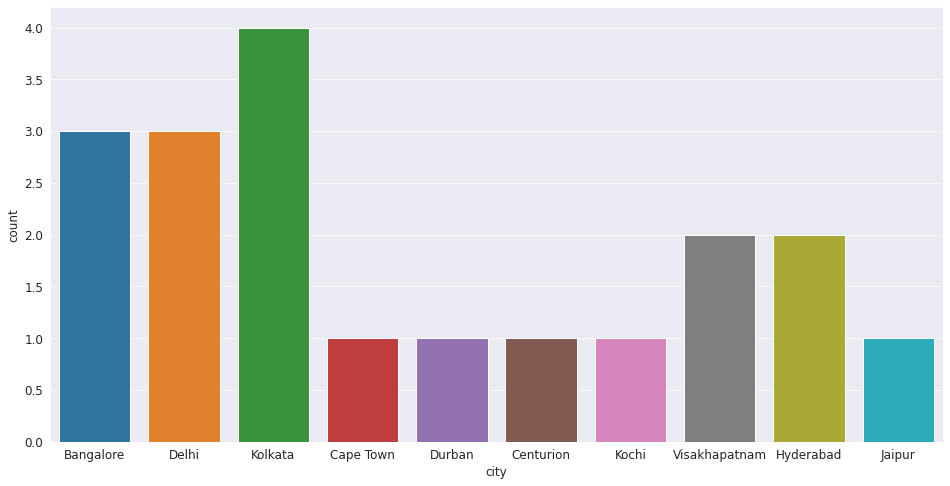

In [27]:
# These are the cities where result is announced on basis of dl method
plt.figure(figsize=(16,8))
sns.countplot(matches_df.city[matches_df.dl_applied == 1])
plt.show()

<Figure size 1296x648 with 0 Axes>

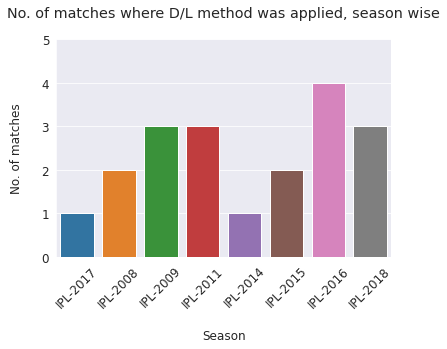

In [31]:
year=matches_df.query('dl_applied==1')['Season']
plt.figure(figsize=(18, 9))
fig, ax=plt.subplots();
ax.set_ylim([0,5]);
ax.set_title('No. of matches where D/L method was applied, season wise\n')
sns.countplot(x=year, data=matches_df);
plt.xlabel('\nSeason')
plt.ylabel('No. of matches\n')
plt.xticks(rotation=45)
plt.show()

As the plot says that Kolkata is the city where match decision are done using dl method

#### Q3. Which Team is most Successful IPL team

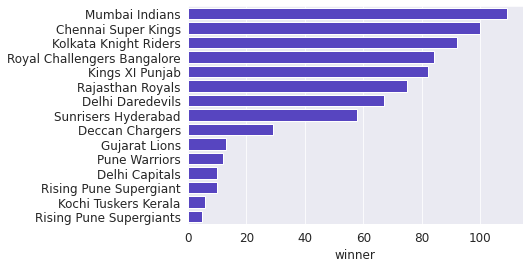

In [41]:
data = matches_df.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h', color='#4831D4');

According to above plot, Mumbai Indians wins most number of times.

#### Q4. What is percentage of winning of Mumbai Indians?

In [42]:
 win = matches_df[matches_df['toss_winner']== 'Mumbai Indians']
win.count()

id                 98
Season             98
city               96
date               98
team1              98
team2              98
toss_winner        98
toss_decision      98
result             98
dl_applied         98
winner             98
win_by_runs        98
win_by_wickets     98
player_of_match    98
venue              98
dtype: int64

In [43]:
# When MI won the toss and also the match
result = win[win['winner'] == 'Mumbai Indians']
result

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium
11,12,IPL-2017,Bangalore,14-04-2017,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,KA Pollard,M Chinnaswamy Stadium
15,16,IPL-2017,Mumbai,16-04-2017,Gujarat Lions,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,N Rana,Wankhede Stadium
21,22,IPL-2017,Indore,20-04-2017,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,JC Buttler,Holkar Cricket Stadium
57,58,IPL-2017,Bangalore,19-05-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,KV Sharma,M Chinnaswamy Stadium
58,59,IPL-2017,Hyderabad,21-05-2017,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal"
85,86,IPL-2008,Mumbai,07-05-2008,Rajasthan Royals,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,7,A Nehra,Dr DY Patil Sports Academy
89,90,IPL-2008,Bangalore,28-05-2008,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,CRD Fernando,M Chinnaswamy Stadium
95,96,IPL-2008,Mumbai,14-05-2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium


In [44]:
#mi means Mumbai Indians wins toss
#mr means Mumbai Indains wins Match also
mi = win.count()
mr = result.count()

In [45]:
mi

id                 98
Season             98
city               96
date               98
team1              98
team2              98
toss_winner        98
toss_decision      98
result             98
dl_applied         98
winner             98
win_by_runs        98
win_by_wickets     98
player_of_match    98
venue              98
dtype: int64

In [46]:
mr

id                 56
Season             56
city               56
date               56
team1              56
team2              56
toss_winner        56
toss_decision      56
result             56
dl_applied         56
winner             56
win_by_runs        56
win_by_wickets     56
player_of_match    56
venue              56
dtype: int64

This shows that Mumbai Indians won the toss 98 times and won the match 56 times
this also shows that 42 times Mumbai Indians lose.So by this info we can plot a pie chart

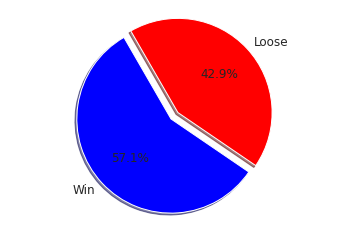

In [47]:
labels = 'Win', 'Loose'
sizes=[56,42]
colors=['blue', 'red']
explode=(0.1,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=120)
plt.axis('equal')
plt.show()

This graph shows the winning percentage of Mumbai Indians is 57.1% and lossing percentage is 42.9%

#### Q5. How many matches tie from 2008-2019?

In [48]:
tie = matches_df[matches_df['result'] == 'tie']
tie.count()

id                 9
Season             9
city               9
date               9
team1              9
team2              9
toss_winner        9
toss_decision      9
result             9
dl_applied         9
winner             9
win_by_runs        9
win_by_wickets     9
player_of_match    9
venue              9
dtype: int64

#### Q6 Which team won by Maximum runs?

In [49]:
matches_df.iloc[matches_df['win_by_runs'].idxmax()]

id                               44
Season                     IPL-2017
city                          Delhi
date                     06-05-2017
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
Name: 43, dtype: object

Mumbai Indians won from maxmium runs by defeating Delhi Daredevils in year 2017.

#### Q7 What is Team Performance of every team in batting in Second Innings?

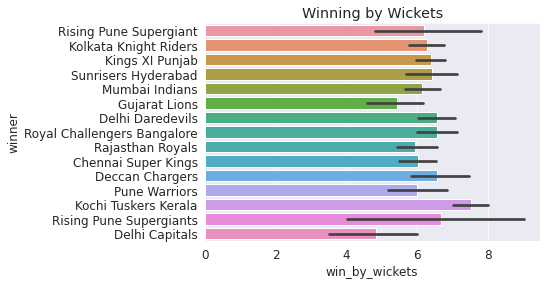

In [50]:
fig, ax = plt.subplots()
ax.set_title("Winning by Wickets")
sns.barplot(y='winner',x='win_by_wickets',data=matches_df[matches_df['win_by_wickets'] > 0], orient = 'h')
plt.show()

#### Q8. What is the winning percentage of Chennai Super Kings?

In [51]:
win = matches_df[matches_df['toss_winner']== 'Chennai Super Kings']
csk_win = win.count()
csk_win

id                 89
Season             89
city               89
date               89
team1              89
team2              89
toss_winner        89
toss_decision      89
result             89
dl_applied         89
winner             89
win_by_runs        89
win_by_wickets     89
player_of_match    89
venue              89
dtype: int64

In [52]:
result = win[win['winner'] == 'Chennai Super Kings']
csk = result.count()
csk

id                 57
Season             57
city               57
date               57
team1              57
team2              57
toss_winner        57
toss_decision      57
result             57
dl_applied         57
winner             57
win_by_runs        57
win_by_wickets     57
player_of_match    57
venue              57
dtype: int64

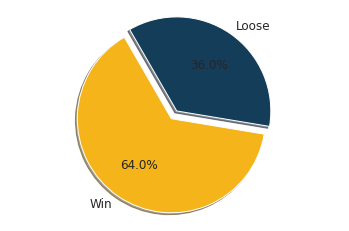

In [53]:
labels = 'Win', 'Loose'
sizes=[57,32]
colors=['#F4B41A', '#143D59']
explode=(0.1,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=120)
plt.axis('equal')
plt.show()

In [54]:
import jovian

In [55]:
jovian.commit(files=['ipl.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "varungupta-cse19/ipl-matches-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/varungupta-cse19/ipl-matches-data-analysis


'https://jovian.ml/varungupta-cse19/ipl-matches-data-analysis'

## Inferences and Conclusion


We.ve drawn many interesting inferences from the dataset, here's a summary of the few of them : 

1. We have found that Mumbai Indians is the best team in performance from the beginning of the IPL.
2. Kokata Knight Rides is the team winning matches from most no. of wickets.
3. Kolkata is the place where most no. of D/L Method is applied and in 2016 most D/L method is applied.
4. We see the winning percentage of Mumbai Indians and Chennai Super Kings.
5. CH Gayle is the player achieving player of the match most no. of times.
6. We also conclude that chasing has higher ratio in winning match.


In [56]:
import jovian

In [ ]:
jovian.commit(files=['ipl.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "varungupta-cse19/ipl-matches-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..


## References and Future Work

TODO

In [55]:
import jovian

In [ ]:
jovian.commit(files=['ipl.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
